# IMPORTING LIBRARIES

In [1]:
import collections
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from scipy.stats import bootstrap

# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [2]:
# Defining the pathways to the switch scanner metrics.
path_metrics_20221213 = '../SourceData/Performance_with_Increasing_Trials_Session20221213.xlsx' # day +81
path_metrics_20221215 = '../SourceData/Performance_with_Increasing_Trials_Session20221215.xlsx' # day +83 
path_metrics_20221216 = '../SourceData/Performance_with_Increasing_Trials_Session20221216.xlsx' # day +84 
path_metrics_20221219 = '../SourceData/Performance_with_Increasing_Trials_Session20221219.xlsx' # day +87
path_metrics_20221221 = '../SourceData/Performance_with_Increasing_Trials_Session20221221.xlsx' # day +89
path_metrics_20230105 = '../SourceData/Performance_with_Increasing_Trials_Session20230105.xlsx' # day +104
path_metrics_20230106 = '../SourceData/Performance_with_Increasing_Trials_Session20230106.xlsx' # day +105
path_metrics_20230110 = '../SourceData/Performance_with_Increasing_Trials_Session20230110.xlsx' # day +109
path_metrics_20230112 = '../SourceData/Performance_with_Increasing_Trials_Session20230112.xlsx' # day +111

# Creating a list of excel files.
excel_files_list = [path_metrics_20221213, path_metrics_20221215, path_metrics_20221216,\
                    path_metrics_20221219, path_metrics_20221221, path_metrics_20230105,\
                    path_metrics_20230106, path_metrics_20230110, path_metrics_20230112]


# Creating the list of all votes from 11/29/2022. Will be the same across all dates.
votes_list = pd.ExcelFile(path_metrics_20221215).sheet_names

# Computing the total number of dates.
n_dates = len(excel_files_list)


In [3]:
# Initializing the dictionary of summary metrics
df_summary_metrics = collections.defaultdict(dict)

# Initializing dictcionaries of mean and median metrics
df_mean_metrics   = collections.defaultdict(dict)
df_median_metrics = collections.defaultdict(dict)

# Iterating across all votes.
for this_vote in votes_list:

    # Initializing the flag for initializing the sensitivity and FPF metrics in the per-vote dictionary.
    flag_init = True

    # Initializing the per-vote dictionary of metrics for each vote across days.
    this_vote_metrics_dict = collections.defaultdict(dict)

    # Iterating through all excel files.
    for n, this_date_excel_file in enumerate(excel_files_list):
        
        # Extracting the date from the current excel file.
        this_date = this_date_excel_file[56:64]

        # Initializing a dictionary of metrics for the current date and vote.
        this_date_vote_metrics_dict = {}

        # Extracting all the metrics from the current date and vote sheet.
        df = pd.read_excel(this_date_excel_file, this_vote);

        # Extracting only the summary rows for each day.
        df_summary = df.loc[df['Date'].str.contains('Total'),:];

        # Extracting the sensntivity, FPF and number of trials.
        this_sensitivity = np.asarray(df_summary['Sensitivity (%)'])
        this_fpf         = np.asarray(df_summary['FPF ( /min)'])
        this_trial_array = np.asarray(df_summary['N Trials'])

        # Extracting the number of True and False positives as well as the number of attempted grasps.
        this_n_tp               = df_summary['N Detections']
        this_n_fp               = df_summary['FPs']
        this_n_attempted_grasps = df_summary['N Grasps']

        # Initializing the sensitivities and fpf keys in the per-vote dictionary once the number of trial models 
        # is determined.
        if flag_init:
            n_trial_models                          = this_trial_array.shape[0]
            this_vote_metrics_dict['sensitivities'] = np.zeros((n_dates, n_trial_models))
            this_vote_metrics_dict['fpf']           = np.zeros((n_dates, n_trial_models))
            flag_init                               = False

        # Filling in the dictionary with the sensitivity and FPF
        this_date_vote_metrics_dict['sensitivities']      = this_sensitivity
        this_date_vote_metrics_dict['fpf']                = this_fpf
        this_date_vote_metrics_dict['n_trials']           = this_trial_array
        this_date_vote_metrics_dict['n_tp']               = this_n_tp
        this_date_vote_metrics_dict['n_attempted_grasps'] = this_n_attempted_grasps
        this_date_vote_metrics_dict['n_fp']               = this_n_fp

        # Adding the summary metrics of the current date and vote.
        df_summary_metrics[this_date][this_vote] = this_date_vote_metrics_dict

        # Populating the array with the vote metrics across all days.
        this_vote_metrics_dict['sensitivities'][n,:] = this_sensitivity
        this_vote_metrics_dict['fpf'][n,:]           = this_fpf

    # Computing the mean metrics across days.
    df_mean_metrics[this_vote]['sensitivities_mean'] = this_vote_metrics_dict['sensitivities'].mean(axis=0)
    df_mean_metrics[this_vote]['fpf_mean']           = this_vote_metrics_dict['fpf'].mean(axis=0)
    df_mean_metrics[this_vote]['n_trials']           = this_trial_array

    # Computing the median metrics across days.
    df_median_metrics[this_vote]['sensitivities_median'] = np.median(this_vote_metrics_dict['sensitivities'], axis=0)
    df_median_metrics[this_vote]['fpf_mean']             = np.median(this_vote_metrics_dict['fpf'], axis=0)
    df_median_metrics[this_vote]['n_trials']             = np.median(this_trial_array, axis=0)


Date:  20221213 	Sensitivities:  [85.50724638 92.02898551 93.47826087 86.95652174 94.20289855 94.20289855]
Date:  20221215 	Sensitivities:  [88.35877863 91.41221374 98.09160305 95.22900763 97.32824427 97.70992366]
Date:  20221216 	Sensitivities:  [84.33931485 86.7862969  91.35399674 86.29690049 93.80097879 94.2903752 ]
Date:  20221219 	Sensitivities:  [80.37383178 93.45794393 93.45794393 90.65420561 95.79439252 95.79439252]
Date:  20221221 	Sensitivities:  [92.88135593 97.28813559 98.6440678  97.62711864 97.96610169 98.98305085]
Date:  20230105 	Sensitivities:  [90.64748201 93.88489209 98.02158273 94.0647482  97.6618705  97.30215827]
Date:  20230106 	Sensitivities:  [72.9281768  81.21546961 89.87108656 80.47882136 90.79189687 90.42357274]
Date:  20230110 	Sensitivities:  [82.60135135 85.64189189 98.64864865 87.16216216 95.94594595 97.2972973 ]
Date:  20230112 	Sensitivities:  [77.90697674 86.04651163 87.40310078 77.51937984 87.20930233 87.59689922]


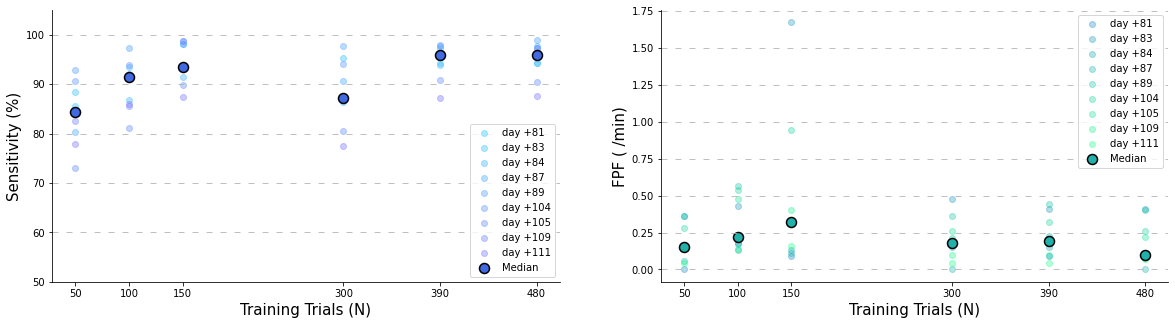

In [4]:

# EXPERIMNETER INPUTS:
color1a    = 'navy' 
color1b    = 'royalblue' 
color2a    = 'darkcyan'
color2b    = 'lightseagreen' 
fig_width  = 20
fig_height = 5
save_figs  = False

# PLOTTING
fig, axs  = plt.subplots(1, 2, figsize = (fig_width, fig_height));

# Extracting the number of trials
n_trials = df_summary_metrics['20221215']['4_votes']['n_trials'].astype(int)

# AXIS LABELS
axs[0].set_xticks(n_trials)
axs[0].set_xticklabels(n_trials)
axs[0].set_xlabel('Training Trials (N)', fontsize = 15);
axs[0].set_ylabel('Sensitivity (%)', fontsize = 15);
axs[0].set_ylim([50,105])
axs[0].spines[['top', 'right']].set_visible(False)
# axs[0].spines[['right']].set_visible(False)
axs[1].set_xticks(n_trials)
axs[1].set_xticklabels(n_trials)
axs[1].set_xlabel('Training Trials (N)', fontsize = 15);
axs[1].set_ylabel('FPF ( /min)', fontsize = 15);
axs[1].spines[['top', 'right']].set_visible(False)


# Creating the array of colors for each point.
n_dates_all = len(df_summary_metrics.keys())
colors_sensitivity = matplotlib.cm.cool(np.linspace(0.2, 0.5, n_dates_all))
colors_fpf         = matplotlib.cm.winter(np.linspace(0.5, 1, n_dates_all))

# Iterating across all dates.
for this_date, this_color_sensitivity, this_color_fpf in zip(df_summary_metrics.keys(), colors_sensitivity, colors_fpf):
    
    # Extracting the summary metrics and means for the current date.
    this_date_summary_metrics = df_summary_metrics[this_date]
    
    # Extracting the sensitivity metrics from the current date.
    this_date_4vote_sensitivities = this_date_summary_metrics['4_votes']['sensitivities']
    
    # Extracting the FPF metrics from the current date.
    this_date_4vote_fpf = this_date_summary_metrics['4_votes']['fpf']
    
    # Plotting the sensitivities for the current date across all trials.
    axs[0].scatter(n_trials, this_date_4vote_sensitivities, color = this_color_sensitivity, alpha = 0.4)
    
    print('Date: ', this_date, '\tSensitivities: ', this_date_4vote_sensitivities)
    
    # Plotting the FPF for the current date across all trials.
    axs[1].scatter(n_trials, this_date_4vote_fpf, color = this_color_fpf, alpha = 0.3)

    
# Extracting the sensitivity and FPF medians.
legend_list = ['day +81','day +83','day +84','day +87','day +89','day +104','day +105','day +109','day +111', 'Median']
sensitivities_medians_4votes = df_median_metrics['4_votes']['sensitivities_median']
fpf_medians_4votes           = df_median_metrics['4_votes']['fpf_mean']
axs[0].scatter(n_trials, sensitivities_medians_4votes, color = color1b, edgecolors = 'k', linewidth = 1.5, s = 100)
# axs[0].axhline(100, color=color1a, linewidth = 1, linestyle = '--', dashes=(10, 5), zorder=1) # alpha = 0.5
axs[0].legend(legend_list);
axs[1].scatter(n_trials, fpf_medians_4votes, color = color2b, edgecolors = 'k', linewidth = 1.5, s = 100)
# axs[1].axhline(0, color=color2a, linewidth = 1, linestyle = '--', dashes=(10, 5))
axs[1].legend(legend_list);
axs[0].grid(axis='y', linestyle='--', dashes=(7.5, 10))
axs[1].grid(axis='y', linestyle='--', dashes=(7.5, 10))


# SAVING
if save_figs:
    fig.savefig('PerformanceVsTrainingData.jpg', bbox_inches = 'tight', dpi=1000)
    fig.savefig('PerformanceVsTrainingData.svg', format = 'svg', bbox_inches='tight', dpi = 2000)


In [5]:
fpf_medians_4votes

array([0.15390041, 0.2211814 , 0.32092877, 0.17771091, 0.19533687,
       0.09618776])

# Computing the performance as a function of different numbers of trials

In [6]:
    
# Initializing the F-scores dictionary.
performance_4votes_per_n_trials = collections.defaultdict(dict)

# Extracting the array of trial numbers..keys()
trials_array = df_mean_metrics['4_votes']['n_trials'].astype(int)
     
# Initializing the dictionary of F-scores for the current voting threshold.
f_scores_n_trials = collections.defaultdict(dict)

# Iterating across all numbers of trials.
for i, tr_count in enumerate(trials_array):
    
    # Initializing the total number of FPs, TPs, and attempted grasps.
    sensitivity_list = []
    fpf_list         = []

    # Iterating across all dates.
    for this_date in df_summary_metrics.keys():

        # Extracting the sensitivities and FPF from the current date.
        this_date_sensitivities = np.asarray(df_summary_metrics[this_date]['4_votes']['sensitivities'])[i]
        this_date_fpf           = np.asarray(df_summary_metrics[this_date]['4_votes']['fpf'])[i]

        # Updating the list of sensitivities and FPF corresponding to the current number of trials.
        sensitivity_list.append(this_date_sensitivities)
        fpf_list.append(this_date_fpf)

    # Updating the F-score information for the current number of trials.
    performance_4votes_per_n_trials[tr_count]['sensitivities'] = sensitivity_list
    performance_4votes_per_n_trials[tr_count]['FPFs']          = fpf_list



# Wilcoxon Rank-Sum Test for Performance with Different Number of Trials vs. 480 Trials Using 4-votes

In [7]:

sensitivity_trcount50_4vote_array  = performance_4votes_per_n_trials[50]['sensitivities']
sensitivity_trcount100_4vote_array = performance_4votes_per_n_trials[100]['sensitivities']
sensitivity_trcount150_4vote_array = performance_4votes_per_n_trials[150]['sensitivities']
sensitivity_trcount300_4vote_array = performance_4votes_per_n_trials[300]['sensitivities']
sensitivity_trcount390_4vote_array = performance_4votes_per_n_trials[390]['sensitivities']
sensitivity_trcount480_4vote_array = performance_4votes_per_n_trials[480]['sensitivities']

w_trcount50_vs_trcount480, p_trcount50_vs_trcount480   = scipy.stats.ranksums(sensitivity_trcount50_4vote_array, sensitivity_trcount480_4vote_array)
w_trcount100_vs_trcount480, p_trcount100_vs_trcount480 = scipy.stats.ranksums(sensitivity_trcount100_4vote_array, sensitivity_trcount480_4vote_array)
w_trcount150_vs_trcount480, p_trcount150_vs_trcount480 = scipy.stats.ranksums(sensitivity_trcount150_4vote_array, sensitivity_trcount480_4vote_array)
w_trcount300_vs_trcount480, p_trcount300_vs_trcount480 = scipy.stats.ranksums(sensitivity_trcount300_4vote_array, sensitivity_trcount480_4vote_array)
w_trcount390_vs_trcount480, p_trcount390_vs_trcount480 = scipy.stats.ranksums(sensitivity_trcount390_4vote_array, sensitivity_trcount480_4vote_array)

# Holm-Bonferroni Correction. 
hb1 = 0.05/(5 - 1 + 1)
hb2 = 0.05/(5 - 2 + 1)
hb3 = 0.05/(5 - 3 + 1)
hb4 = 0.05/(5 - 4 + 1)
hb5 = 0.05/(5 - 5 + 1)

print('SENSITIVITY')
print('P-value (Sensitivity 50 vs. 480 trials): ', np.round(p_trcount50_vs_trcount480, 5),   '\t < HB1: ', np.round(hb1, 5))
print('P-value (Sensitivity 100 vs. 480 trials): ', np.round(p_trcount100_vs_trcount480, 5), '\t > HB2: ', np.round(hb2, 5))
print('P-value (Sensitivity 150 vs. 480 trials): ', np.round(p_trcount150_vs_trcount480, 5), '\t > HB5: ', np.round(hb5, 5))
print('P-value (Sensitivity 300 vs. 480 trials): ', np.round(p_trcount300_vs_trcount480, 5), '\t > HB3: ', np.round(hb3, 5))
print('P-value (Sensitivity 390 vs. 480 trials): ', np.round(p_trcount390_vs_trcount480, 5), '\t > HB4: ', np.round(hb4, 5))
print('\n')
print('W-statistic (Sensitivity 50 vs. 480 trials): ', np.round(w_trcount50_vs_trcount480, 5))
print('W-statistic (Sensitivity 100 vs. 480 trials): ', np.round(w_trcount100_vs_trcount480, 5))
print('W-statistic (Sensitivity 150 vs. 480 trials): ', np.round(w_trcount150_vs_trcount480, 5))
print('W-statistic (Sensitivity 300 vs. 480 trials): ', np.round(w_trcount300_vs_trcount480, 5))
print('W-statistic (Sensitivity 390 vs. 480 trials): ', np.round(w_trcount390_vs_trcount480, 5))


print('\n\n')


fpf_trcount50_4vote_array  = performance_4votes_per_n_trials[50]['FPFs']
fpf_trcount100_4vote_array = performance_4votes_per_n_trials[100]['FPFs']
fpf_trcount150_4vote_array = performance_4votes_per_n_trials[150]['FPFs']
fpf_trcount300_4vote_array = performance_4votes_per_n_trials[300]['FPFs']
fpf_trcount390_4vote_array = performance_4votes_per_n_trials[390]['FPFs']
fpf_trcount480_4vote_array = performance_4votes_per_n_trials[480]['FPFs']

w_trcount50_vs_trcount480, p_trcount50_vs_trcount480   = scipy.stats.ranksums(fpf_trcount50_4vote_array, fpf_trcount480_4vote_array)
w_trcount100_vs_trcount480, p_trcount100_vs_trcount480 = scipy.stats.ranksums(fpf_trcount100_4vote_array, fpf_trcount480_4vote_array)
w_trcount150_vs_trcount480, p_trcount150_vs_trcount480 = scipy.stats.ranksums(fpf_trcount150_4vote_array, fpf_trcount480_4vote_array)
w_trcount300_vs_trcount480, p_trcount300_vs_trcount480 = scipy.stats.ranksums(fpf_trcount300_4vote_array, fpf_trcount480_4vote_array)
w_trcount390_vs_trcount480, p_trcount390_vs_trcount480 = scipy.stats.ranksums(fpf_trcount390_4vote_array, fpf_trcount480_4vote_array)

print('FPF')
print('P-value (FPF 50 vs. 480 trials): ', np.round(p_trcount50_vs_trcount480, 5),   '\t > HB5: ', np.round(hb5, 5))
print('P-value (FPF 100 vs. 480 trials): ', np.round(p_trcount100_vs_trcount480, 5), '\t > HB1: ', np.round(hb1, 5))
print('P-value (FPF 150 vs. 480 trials): ', np.round(p_trcount150_vs_trcount480, 5), '\t > HB2: ', np.round(hb2, 5))
print('P-value (FPF 300 vs. 480 trials): ', np.round(p_trcount300_vs_trcount480, 5), '\t > HB4: ', np.round(hb4, 5))
print('P-value (FPF 390 vs. 480 trials): ', np.round(p_trcount390_vs_trcount480, 5), '\t > HB3: ', np.round(hb3, 5))
print('\n')
print('W-statistic (Sensitivity 50 vs. 480 trials): ', np.round(w_trcount50_vs_trcount480, 5))
print('W-statistic (Sensitivity 100 vs. 480 trials): ', np.round(w_trcount100_vs_trcount480, 5))
print('W-statistic (Sensitivity 150 vs. 480 trials): ', np.round(w_trcount150_vs_trcount480, 5))
print('W-statistic (Sensitivity 300 vs. 480 trials): ', np.round(w_trcount300_vs_trcount480, 5))
print('W-statistic (Sensitivity 390 vs. 480 trials): ', np.round(w_trcount390_vs_trcount480, 5))



SENSITIVITY
P-value (Sensitivity 50 vs. 480 trials):  0.00172 	 < HB1:  0.01
P-value (Sensitivity 100 vs. 480 trials):  0.01517 	 > HB2:  0.0125
P-value (Sensitivity 150 vs. 480 trials):  0.89463 	 > HB5:  0.05
P-value (Sensitivity 300 vs. 480 trials):  0.02434 	 > HB3:  0.01667
P-value (Sensitivity 390 vs. 480 trials):  0.82528 	 > HB4:  0.025


W-statistic (Sensitivity 50 vs. 480 trials):  -3.13473
W-statistic (Sensitivity 100 vs. 480 trials):  -2.42831
W-statistic (Sensitivity 150 vs. 480 trials):  -0.13245
W-statistic (Sensitivity 300 vs. 480 trials):  -2.25171
W-statistic (Sensitivity 390 vs. 480 trials):  -0.22076



FPF
P-value (FPF 50 vs. 480 trials):  0.85982 	 > HB5:  0.05
P-value (FPF 100 vs. 480 trials):  0.05763 	 > HB1:  0.01
P-value (FPF 150 vs. 480 trials):  0.11196 	 > HB2:  0.0125
P-value (FPF 300 vs. 480 trials):  0.72393 	 > HB4:  0.025
P-value (FPF 390 vs. 480 trials):  0.37722 	 > HB3:  0.01667


W-statistic (Sensitivity 50 vs. 480 trials):  -0.1766
W-statistic (S

# 95% Confidence Interval of the Median for Performance Metrics

In [8]:

n_resamples = 10000

ci_95_sensitivity_trcount50_4vote  = bootstrap((sensitivity_trcount50_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_sensitivity_trcount100_4vote = bootstrap((sensitivity_trcount100_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_sensitivity_trcount150_4vote = bootstrap((sensitivity_trcount150_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_sensitivity_trcount300_4vote = bootstrap((sensitivity_trcount300_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_sensitivity_trcount390_4vote = bootstrap((sensitivity_trcount390_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_sensitivity_trcount480_4vote = bootstrap((sensitivity_trcount480_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_fpf_trcount50_4vote  = bootstrap((fpf_trcount50_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_trcount100_4vote = bootstrap((fpf_trcount100_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_trcount150_4vote = bootstrap((fpf_trcount150_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_trcount300_4vote = bootstrap((fpf_trcount300_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_trcount390_4vote = bootstrap((fpf_trcount390_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_trcount480_4vote = bootstrap((fpf_trcount480_4vote_array,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval


print('95% CI Sensitivity (4-vote, 50 trials): ', ci_95_sensitivity_trcount50_4vote)
print('95% CI Sensitivity (4-vote, 100 trials): ', ci_95_sensitivity_trcount100_4vote)
print('95% CI Sensitivity (4-vote, 150 trials): ', ci_95_sensitivity_trcount150_4vote)
print('95% CI Sensitivity (4-vote, 300 trials): ', ci_95_sensitivity_trcount300_4vote)
print('95% CI Sensitivity (4-vote, 390 trials): ', ci_95_sensitivity_trcount390_4vote)
print('95% CI Sensitivity (4-vote, 480 trials): ', ci_95_sensitivity_trcount480_4vote)

print('\n')

print('95% CI FPF (4-vote, 50 trials): ', ci_95_fpf_trcount50_4vote)
print('95% CI FPF (4-vote, 100 trials): ', ci_95_fpf_trcount100_4vote)
print('95% CI FPF (4-vote, 150 trials): ', ci_95_fpf_trcount150_4vote)
print('95% CI FPF (4-vote, 300 trials): ', ci_95_fpf_trcount300_4vote)
print('95% CI FPF (4-vote, 390 trials): ', ci_95_fpf_trcount390_4vote)
print('95% CI FPF (4-vote, 480 trials): ', ci_95_fpf_trcount480_4vote)



95% CI Sensitivity (4-vote, 50 trials):  ConfidenceInterval(low=79.62264963308832, high=87.56426153573892)
95% CI Sensitivity (4-vote, 100 trials):  ConfidenceInterval(low=86.54623671471813, high=92.7050487541713)
95% CI Sensitivity (4-vote, 150 trials):  ConfidenceInterval(low=91.59093443715506, high=96.70165944743209)
95% CI Sensitivity (4-vote, 300 trials):  ConfidenceInterval(low=84.15768115985054, high=92.32788486895252)
95% CI Sensitivity (4-vote, 390 trials):  ConfidenceInterval(low=91.71269184231892, high=96.269514601827)
95% CI Sensitivity (4-vote, 480 trials):  ConfidenceInterval(low=91.95465433041954, high=96.72220451872128)


95% CI FPF (4-vote, 50 trials):  ConfidenceInterval(low=0.09838919121103211, high=0.2614512271999005)
95% CI FPF (4-vote, 100 trials):  ConfidenceInterval(low=0.2101686556595408, high=0.43367825729172915)
95% CI FPF (4-vote, 150 trials):  ConfidenceInterval(low=0.2298743348407308, high=0.953925776432188)
95% CI FPF (4-vote, 300 trials):  ConfidenceInte